In [9]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
%matplotlib inline
import random
import cv2
import glob
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN


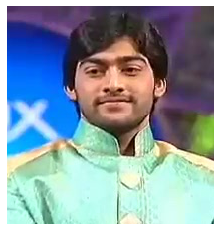

<Figure size 1296x1296 with 0 Axes>

In [89]:
img = np.load("youtube_faces_with_keypoints_large_1/"+'Ali_Abbas_4.npz')
plt.imshow(img["colorImages"][:,:,:,1])
plt.axis("off");
plt.figure(figsize=(18,18))
plt.imsave("a.png",img["colorImages"][:,:,:,1])

In [2]:
path = '.'
files = [f for f in glob.glob(path + "/**/*.npz", recursive=True)]

In [78]:
len(files)

1293

In [76]:
frames = 0
for file in files: 
    frames +=  np.load(file)["colorImages"].shape[3]

In [77]:
frames

155560

In [132]:
os.makedirs("Sample")
for file in files:
    
    npz = np.load(file) 
    file = file.split("/")[-1]
    frame = random.randint(1,npz["colorImages"].shape[3]-1)
    
    #Save image
    plt.imsave(f"Sample/{file}-{frame}.png", npz["colorImages"][:,:,:,frame])
    
    #Save npz
    np.savez(f"Sample/{file}-{frame}.npz",boundingBox = npz['boundingBox'][::frame],
landmarks3D = npz['landmarks3D'][:,:,frame],
landmarks2D= npz['landmarks2D'][:,:,frame],
colorImages= npz['colorImages'][:,:,:,frame]) 

In [10]:
path = 'Sample/'

pic_files = [f for f in glob.glob(path + "/**/*.npz", recursive=True)]
images = [f for f in glob.glob(path + "/**/*.png", recursive=True)]

In [140]:
len(pic_files)

1293

In [23]:

imagePath= images[4]
def find_face_haar(imagePaths, show = False ):
    result = []
    if type(imagePaths) ==str:
        imagePaths = [imagePaths]
    for imagePath in imagePaths:  
        cascPath = "/Users/nayefalhaidari/fihmai/haarcascade_frontalface_default.xml"

        faceCascade = cv2.CascadeClassifier(cascPath)

        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
        )

        result.append(len(faces))

    # Draw a rectangle around the faces
        if show and len(imagePaths) ==1:
            print (1)
            for (x, y, w, h) in faces:
                cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(image ,"Face",(x, y-3),cv2.FONT_HERSHEY_SIMPLEX ,0.5,(0,255,0),2,cv2.LINE_AA)
                
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
    return result

# show using matplotlib




In [14]:
r_haar = find_face_haar(images)

In [24]:
r_haar.index(0,37)

114

1


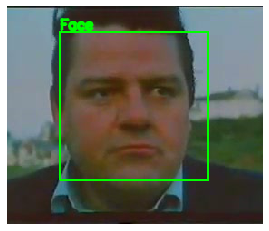

[1]

In [25]:
find_face_haar(images[3],show=1)

In [20]:
images[3]

'Sample/Robbie_Coltrane_2.npz-153.png'

In [ ]:
def extract_face(imagePaths,show =False, required_size=(160, 160)):
    result = []
    if type(imagePaths) ==str:
        imagePaths = [imagePaths]
    
    for filename in imagePaths:    
        image = Image.open(filename)
        image = image.convert('RGB')
        detector = MTCNN()
        results = detector.detect_faces(pixels)
        x1, y1, width, height = results[0]['box']
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        face = pixels[y1:y2, x1:x2]
        result.append(len(results))
        
        if show and len(imagePaths) == 1:
            image = Image.fromarray(face)
            image = image.resize(required_size)
            face_array = asarray(image)
            plt.imshow(face_array)
    return result

r_mtcnn = extract_face(images[:20])

In [ ]:
r_mtcnn

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
cap = cv2.VideoCapture(0)
ret, image = cap.read()
image=cv2.resize(image,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_AREA)
plt.imshow(image)
plt.show()

In [ ]:
#Detect using haar
#Detect using mtcnn

#### the project took longer that what I thought I'll submit it without validation
